# 시작하기 전에

---

사진 데이터의 경우 데이터가 커서 용량을 많이 차지한다. 따라서 차원을 축소하는 것 역시 중요하다.

# 차원과 차원 축소

---

지금까지 학습한 내용에 따르면 데이터 가진 속성을 특성(feature)이라 불렀다. 과일 사진의 경우 픽셀이 100 * 100이라면 10000개의 픽셀이 있는것이고, 10000개의 특성이 있는 셈이다.

10000개의 특성은 10000개의 차원이라는건데 이 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있을 것이다.

* 2차원 배열과 1차원 배열의 차원  
다차원 배열에서 차원은 축 개수가 된다.
> ex) x, y의 2변수함수 : 2차원, x, y, z의 3변수함수 : 3차원


* 그런데 1차원 배열, 즉 벡터인 경우에는 원소의 개수가 차원이 된다.  
1차원 배열, 5차원 벡터

이를 위하서 비지도 학습 작업 중 하나인 ***차원 축소(dimensionality reduction)*** 알고리즘을 다뤄본다.  

회귀알고리즘을 학습할 당시에 특성(차원)이 너무 많으면 선형 모델의 성능은 높아지지만 train_input에 쉽게 과대적합 되고, 이를 방지하기 위해서 규제를 했었다.

차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.

만일 10000개의 차원에서 차원 축소를 통해 차원이 줄어들었다면 손실을 최대한으로 줄이면서 복원할 수도 있다. 이번 학습에서는 대표적인 차원 축소 알고리즘은 <U>***주성분 분석(principal component analysis)***</U> 를 알아본다.
> 간단히 PCA로도 표현한다.

#주성분 분석(PCA)

---

PCA는 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있다.  
> 분산은 데이터가 널리 퍼져있는 정도를 의마한다.

분산이 큰 방향이라는 것은 데이터를 잘 표현하는 어떤 벡터라고 생각할 수 있다.

Linear Regression의 그 선이 벡터가 된다고 봐도 무방하다.

sklearn의 경우에는 train_input을 원점에 맞춰고 분산을 잘 표현하는 벡터를 표현한다

데이터의 분산을 가장 잘 표현한 벡터를 주성분(principal component)이라 한다.
이 주성분 벡터는 원본 데이터에 있는 어떤 방향이다. 따라서 주성분 벡터의 원소 개수는 원본 데이터 셋에 있는 특성 개수와 같다. 하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있다.

어떠한 2차원 좌표값을 가지는 하나의 샘플을 주성분 벡터에 투영하면 1차원 데이터를 만들 수 있다.

<U>주성분은 원본 차원과 같고 바꾼 데이터는 차원이 줄어든다</U>

주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있을 것이다.

첫번째 주성분을 찾은 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다. 이 벡터가 두번째 주성분이다.

> 일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있다

#PVA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)



--2024-01-27 17:18:11--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-01-27 17:18:11--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-01-27 17:18:12--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

sklean은 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공한다.  
PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 한다.  
> k-means와 같이 비지도 학습이기 때문에 target은 필요하지 않다.

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어있으므로 주성분의 크기를 확인할 수 있다.

In [3]:
print(pca.components_.shape)

(50, 10000)


n_components = 50으로 지정했기 때문에 pca.components_ 배열의 첫번째 차원(주성분 개수)이 50이다.  
두 번째 차원은 원본 데이터의 특성 개수와 같은 10000이 나온것을 확인할 수 있다.

원본 데이터와 차원이 같으므로 주성분을 이미지처럼 출력해볼 수 있다.
> 현재 components의 차원은 2차원이므로 reshape를 통해서 원본 데이터와 같은 차원으로 만들어 주어야 한다.

In [4]:
def draw_fruits(arr, ratio = 1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10

  fig, axs = plt.subplots(rows, cols, figsize = (ratio * cols, ratio * rows), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 +j < n:
        axs[i,j].imshow(arr[i * 10 + j], cmap = 'gray_r')
      axs[i,j].axis('off')
  plt.show()

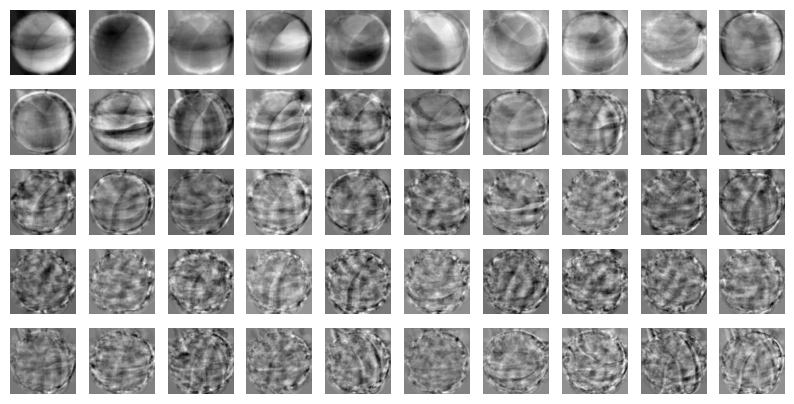

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다.  
> 한편으로는 데이터세트에 있는 어떤 특징을 잡아낸 것처럼 생각할 수 있다

주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄일 수 있다.

이는 마치 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수 있다. PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄여본다.

In [6]:
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)

print(fruits_pca.shape)

(300, 10000)
(300, 50)


기존에 10000개의 차원을 50개의 주성분을 통해서 성공적으로 줄인 모습을 확인할 수 있다.

# 원본 데이터 재구성

---

앞서 10000개의 특성을 50개로 줄였다. 이로 인해 어느정도 손실이 발생할 수 있지만 최대한 분산이 큰 방향으로 데이터를 투영했기 떄문에 원본 데이터를 상당 부분 재구성 할 수 있다. PCA 클래스는 이를 위해 inverse_transform()메서드를 제공한다.  
앞서 50개의 차원으로 축소한 fruits_pca 데이터를 전달해 10000개의 특성을 복원한다.

In [7]:
fruits_inverse = pca.inverse_transform(fruits_pca)

# 재구성 데이터 배열 크기 확인
print(fruits_inverse.shape)

(300, 10000)


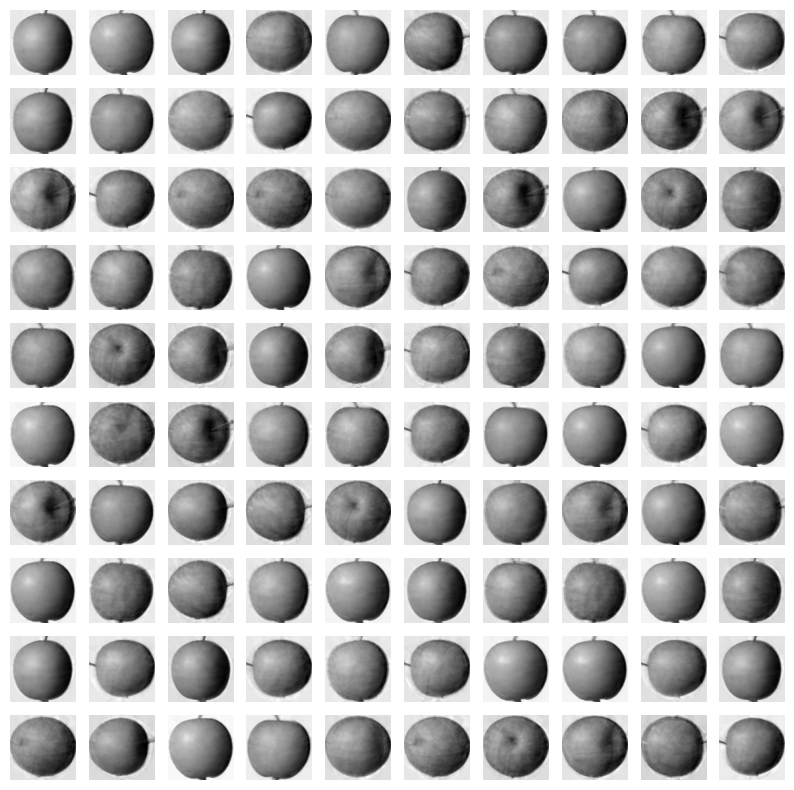

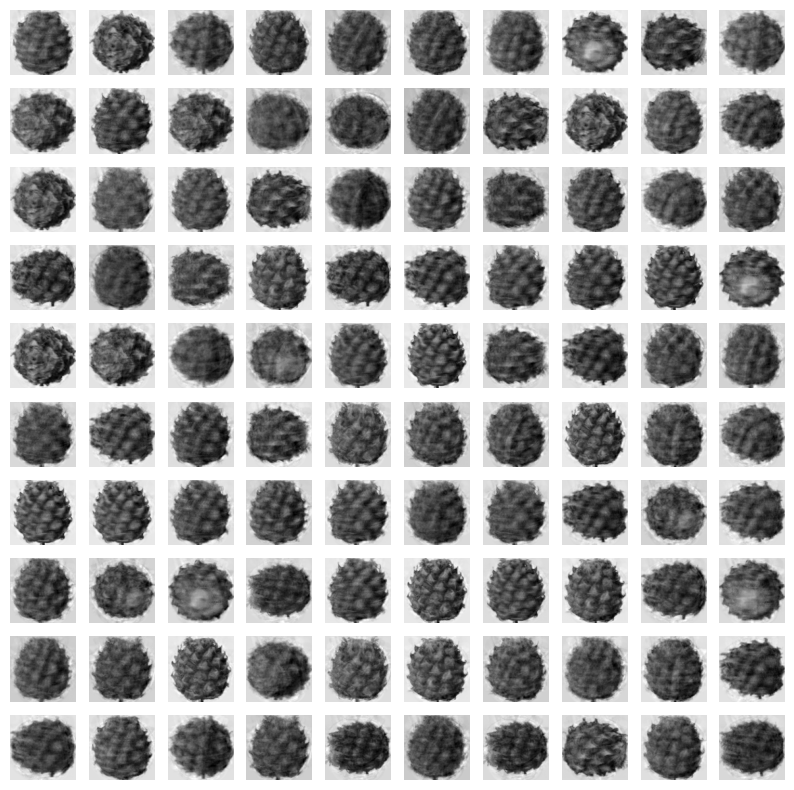

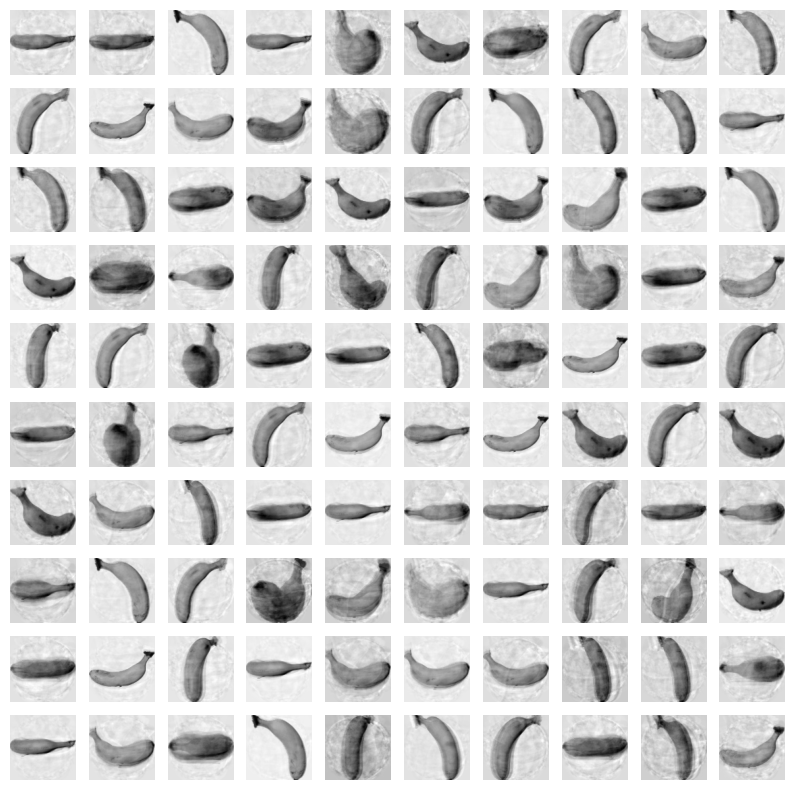

In [8]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

이미지를 나타낼 때 for문을 사용해서 나타내는데 이 경우 아래와 같은 두가지 방식으로 나타낼 수 있다.

In [9]:
for i in range(0, 201, 100):
  print("current i value is : %s " %i)

for start in [0, 100, 200]:
  print("current start value is : %s" %start)

current i value is : 0 
current i value is : 100 
current i value is : 200 
current start value is : 0
current start value is : 100
current start value is : 200


# 설명된 분산

---

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 ***설명된 분산(explained variance)***라고 한다.  
> 설명된 분산은 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값이다.  

PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다.  
물론 분산이 큰 방향을 순서대로 나타내기 때문에 첫 번째 주성분의 설명된 분산이 가장 크다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [10]:
print(np.sum(pca.explained_variance_ratio_))

print(pca.explained_variance_ratio_.shape)

0.9214328846595641
(50,)


총 분산 비율은 대략 92%인데, 이는 전체 데이터의 92%를 잘 나타내고 있다고 말할 수 있다.

설명된 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는데 도움이 된다.

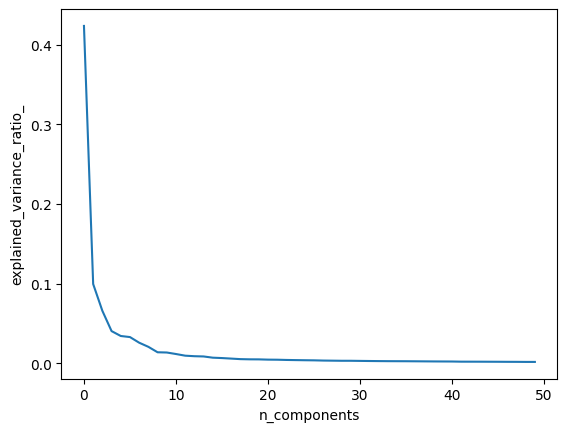

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("n_components")
plt.ylabel("explained_variance_ratio_")
plt.show()

주 성분의의 개수에 따른 분산 비율을 살펴보면 20개 이상부터는 원본 데이터의 분산을 잘 나타내주지는 못하는듯 하다.

In [12]:
pca20 = PCA(n_components = 20)
pca20.fit(fruits_2d)

print(np.sum(pca20.explained_variance_ratio_))

0.8416545495758464


# 다른 알고리즘과 함께 사용하기

---

과일 사진 왼본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해보고 어떤 차이가 있는지 알아본다.  
사과, 파인애플, 바나나의 사진을 분류해야하므로 간단히 Logistic Regression을 통해서 알아본다.

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [14]:
# target 만들기

target = np.array([0] * 100 + [1] * 100 + [2] * 100)

원본 데이터인 fruits_2d를 사용하고 lr모델에서 성능을 가늠해보기 위해 cross_validate() 함수로 교차 검증을 수행한다.

In [15]:
from sklearn.model_selection import cross_validate
# lr.fit(fruits_2d, target)

scores = cross_validate(lr, fruits_2d, target, return_train_score = True)

print(np.mean(scores['test_score']))
print(np.mean(scores['train_score']))

print(np.mean(scores['fit_time']))

0.9966666666666667
1.0
3.0219351291656493


10000개의 특성을 사용했기 때문에 300개의 샘플에 대한 회귀에서는 과대적합된 모델을 만들기 쉽다.  
다음으로 pca로 축소한 fruits_pca의 교차검증 점수와 훈련 시간을 확인해보자

In [16]:
pca_scores = cross_validate(lr, fruits_pca, target, return_train_score = True)

print(np.mean(pca_scores['test_score']))
print(np.mean(pca_scores['train_score']))

print(np.mean(pca_scores['fit_time']))

1.0
1.0
0.06877918243408203


뭔가 잘못된게 아닌가 싶을정도로 훨씬 빠른 훈련 시간을 확인할 수 있었다.

PCA 클래스를 사용할 때 n_components 매개변수를 통해서 주성분의 개수를 지정하였는데, 원하는 설명된 분산의 비율을 입력할 수도 있다.

0 ~ 1 사이의 비율을 실수로 입력하면 원본 데이터에 있는 분산의 비율을 표현할 수 있다.

In [17]:
pca_ratio = PCA(n_components = 0.5)
pca_ratio.fit(fruits_2d)
print(pca_ratio.n_components_)

2


2개만의 주성분으로 원본 데이터의 50%에 해당하는 분산을 표현할 수 있음을 확인하였다.

In [18]:
# 원본 데이터로 변환
fruits_pca = pca_ratio.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


변환한 데이터를 교차검증을 통해서 정확도를 확인한다.

In [19]:
scores = cross_validate(lr, fruits_pca, target, return_train_score = True)

print(np.mean(scores['test_score']))
print(np.mean(scores['train_score']))

print(np.mean(scores['fit_time']))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9933333333333334
1.0
0.06839423179626465


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


모델이 수렴하지 못해서 출력된 경고문구를 제외하고 성능에대한 점수는 아주 높게 나타난 모습을 확인할 수 있다.

차원 축소된 데이터를 사용해서 k-means 알고리즘으로 클러스터를 찾아본다.

In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state = 42)

km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts = True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


차원 축소를 통해서 300개의 과일 사진을 2개의 차원으로 나타내는데 큰 무리없이 해냈다. 이제 각 군집을 출력해본다.

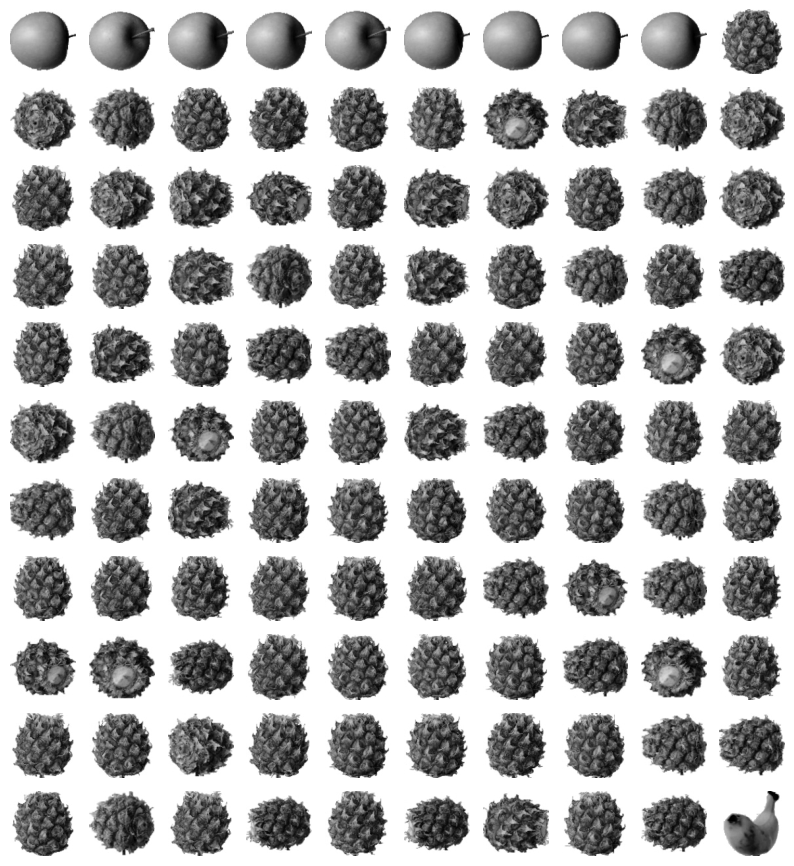

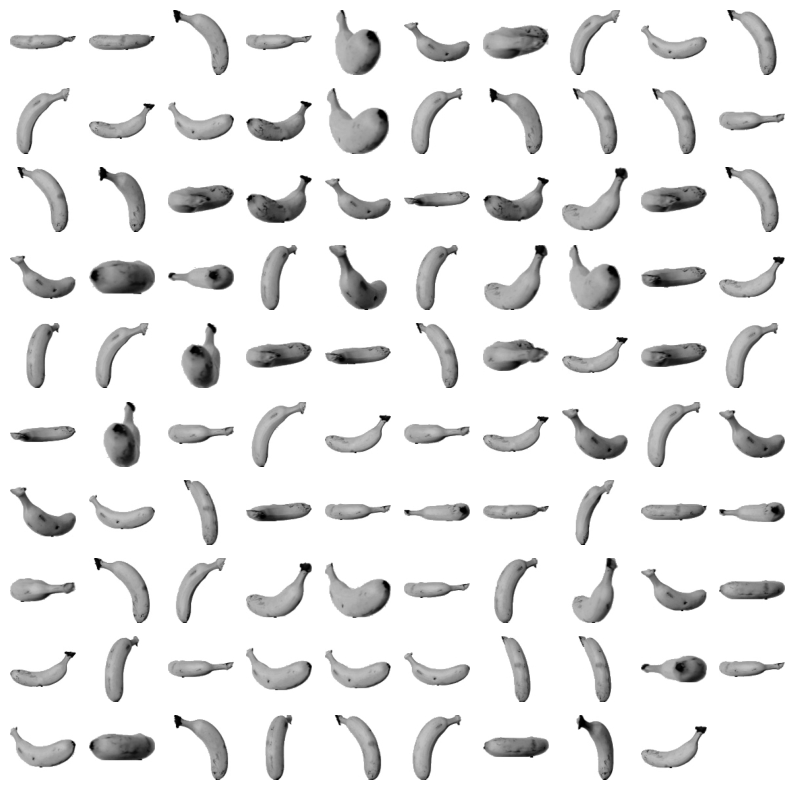

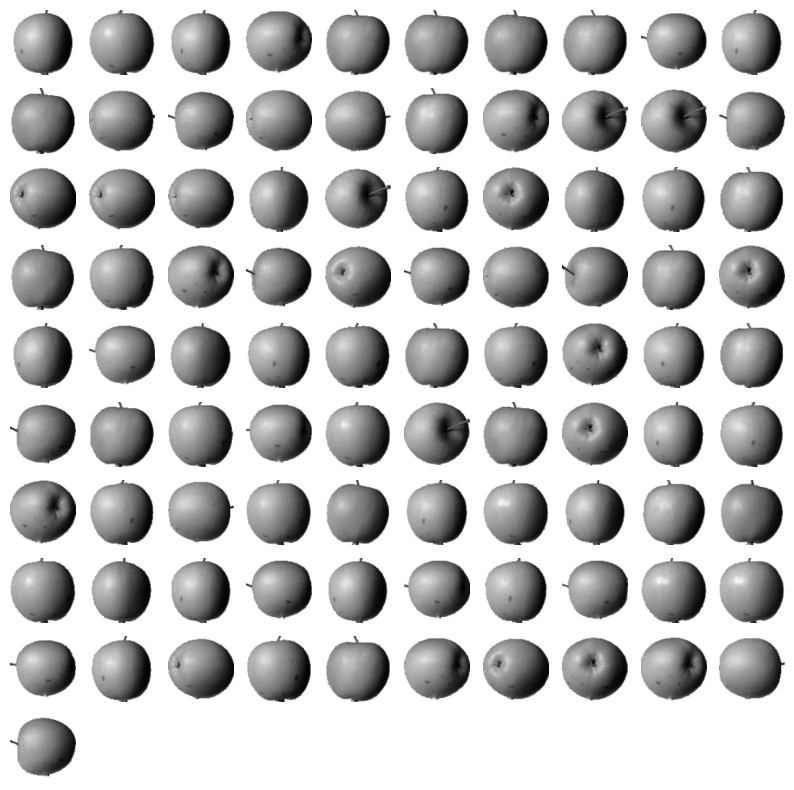

In [25]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

결과적으로 파인애플을 클러스터링 하는 과정에서 사과와 바나나가 조금 섞이긴 했지만 사과와 바나나는 잘 분류해냈다.

훈련 데이터의 차원을 줄기면 또 하나 얻을 수 있는 장점은 시각화이다. 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다. fruits_pca 데이터는 2개의 특성이기 때문에 2차원으로 표현할 수 있다. 앞에서 찾은 km.labels_를 사용해서 클러스터별로 나누어 산점도를 그려본다.

In [34]:
print(type(km.labels_))
a = np.array([0, 1, 0, 1, 0])
print(fruits_pca[km.labels_ == 1].shape)

<class 'numpy.ndarray'>
(99, 2)


(110, 2)
(99, 2)
(91, 2)


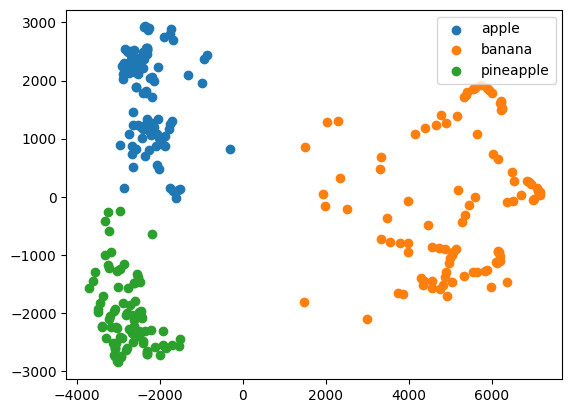

In [32]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
  print(data.shape)
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

각 클러스터의 산점도가 아주 잘 구분되는 모습을 확인할 수 있다. 2개의 특성만을 사용했는데 로지스틱 회귀 모델의 교차 검증 점수가 상당히 높았던 이유를 알 수 있었다.

위 산점도를 보면 사과와 파인애플의 경계가 모호해서 혼동을 일으킬 수 있다는 점을 시각화를 통해서 확인할 수 있다.

(2, 10000)


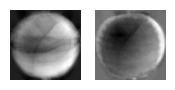

In [39]:
# 주성분의 이미지 확인
print(pca_ratio.components_.shape)

draw_fruits(pca_ratio.components_.reshape(-1, 100, 100))

# 고찰

---

이번에는 차원 축소에 대해서 학습하였다.

여기서 차원이라는 것은 축의 문제가 아니라, 특성의 차원을 말하는 것이다.  
사진의 경우 10000개의 픽셀을 가지고 있는데 이 경우 이번 데이터셋에서 차원은(300, 10000)으로 300개의 사진에 각각 10000개의 특성을 가지고 있는 것이다.  

따라서 원본 데이터의 분산을 가장 잘 표현할 수 있는 벡터인 주성분 벡터에 대해서 알아보았다. 첫 번째 주성분을 찾은 다음 그 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는식으로 주성분 벡터를 찾아 나간다.

PCA 클래스를 사용하는 전반적인 과정은 다음과 같다.

* pca클래스를 n_components 매개변수 선언과 함께 객체 선언
```
from sklearn.decomposition import PCA
pca = PCA(n_components = n)
```
* 2d변환 데이터를 객체에 fit
```
data_2d = data.reshape(-1, 100 * 100)
```
* object에 2d원본 데이터를 transform()을 사용해서 변환
```
data_pca = pca.transform(data_2d)
```
  * 만일 원본 데이터를 재구성 하고 싶다면 inverse_transform()을 사용해서 재구성
  ```
  data_pca_inverse = pca.inverse_transform(data_pca)
  ```

이후에 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값인 <U>설명된 분산</U>을 pca.explained_variance_ratio_를 통해서 확인하고 최적의 n_components를 찾을 수 있다.

이후에 분류기와 함께 사용하여 적은 n_component를 사용해도 검증의 결과가 잘 나오는지 확인하면서 학습을 진행하였고 적은 주성분 만으로 원본 데이터의 분산을 상당 부분 잘 확인할 수 있었다.
